In [30]:
# log_dir = "/import/macyang_home1/share/ychenlp/ALL_LOG/Log_test_fpn_level_0_8_um/"
log_dir = "/import/macyang_home2/ychenlp/Code/SpotFPN/Log_test/"

In [101]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import distinctipy

In [299]:
raw_map = tifffile.imread("/import/macyang_home1/share/ychenlp/preprocessed/gene_map.tiff")

In [300]:
raw_map.shape

(3160, 2508, 2000)

In [102]:
def visualize_deconv_map(deconv_map, celltype_names):


    fig, ax = plt.subplots(6, 7, figsize=(20, 20))

    for i in range(6):
        for j in range(7):
            if i*7+j >= 41:
                break
            ax[i, j].imshow(deconv_map[:, :, i*7+j], cmap='jet')
            ax[i, j].set_title(celltype_names[i*7+j])
            ax[i, j].axis('off')

In [403]:
celltype_names = np.load("/import/macyang_home1/share/ychenlp/preprocessed/celltype_names.npy")
colors = distinctipy.get_colors(len(celltype_names) + 1, pastel_factor=0.3, rng=10)
# Color 0 is for background
colors[0] = (1, 1, 1)

def plot_top_view(deconv_map, celltype_names, roi = None, size=1, alpha = 1, he_aligned=None, ax = None):
    if roi is not None:
        deconv_map = deconv_map[roi[0]:roi[1], roi[2]:roi[3], :]
    if he_aligned is not None:
        he_aligned = he_aligned[roi[0]:roi[1], roi[2]:roi[3], :]
    # Argmax along the z axis
    deconv_map_sum = np.sum(deconv_map, axis=2)
    zero_mask = deconv_map_sum == 0
    argmax_deconv_map = np.argmax(deconv_map, axis=2) + 1
    argmax_deconv_map[zero_mask] = 0
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    for i in range(len(colors)):
        # (0,0) is on the top left corner
        if i == 0:
            continue
        ax.scatter(np.where(argmax_deconv_map == i)[1], np.where(argmax_deconv_map == i)[0], color=colors[i], s=size, label=celltype_names[i - 1], alpha=alpha)
    if he_aligned is not None:
        ax.imshow(he_aligned)
    else:
        ax.invert_yaxis()
    # Legend outside the plot of two columns
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

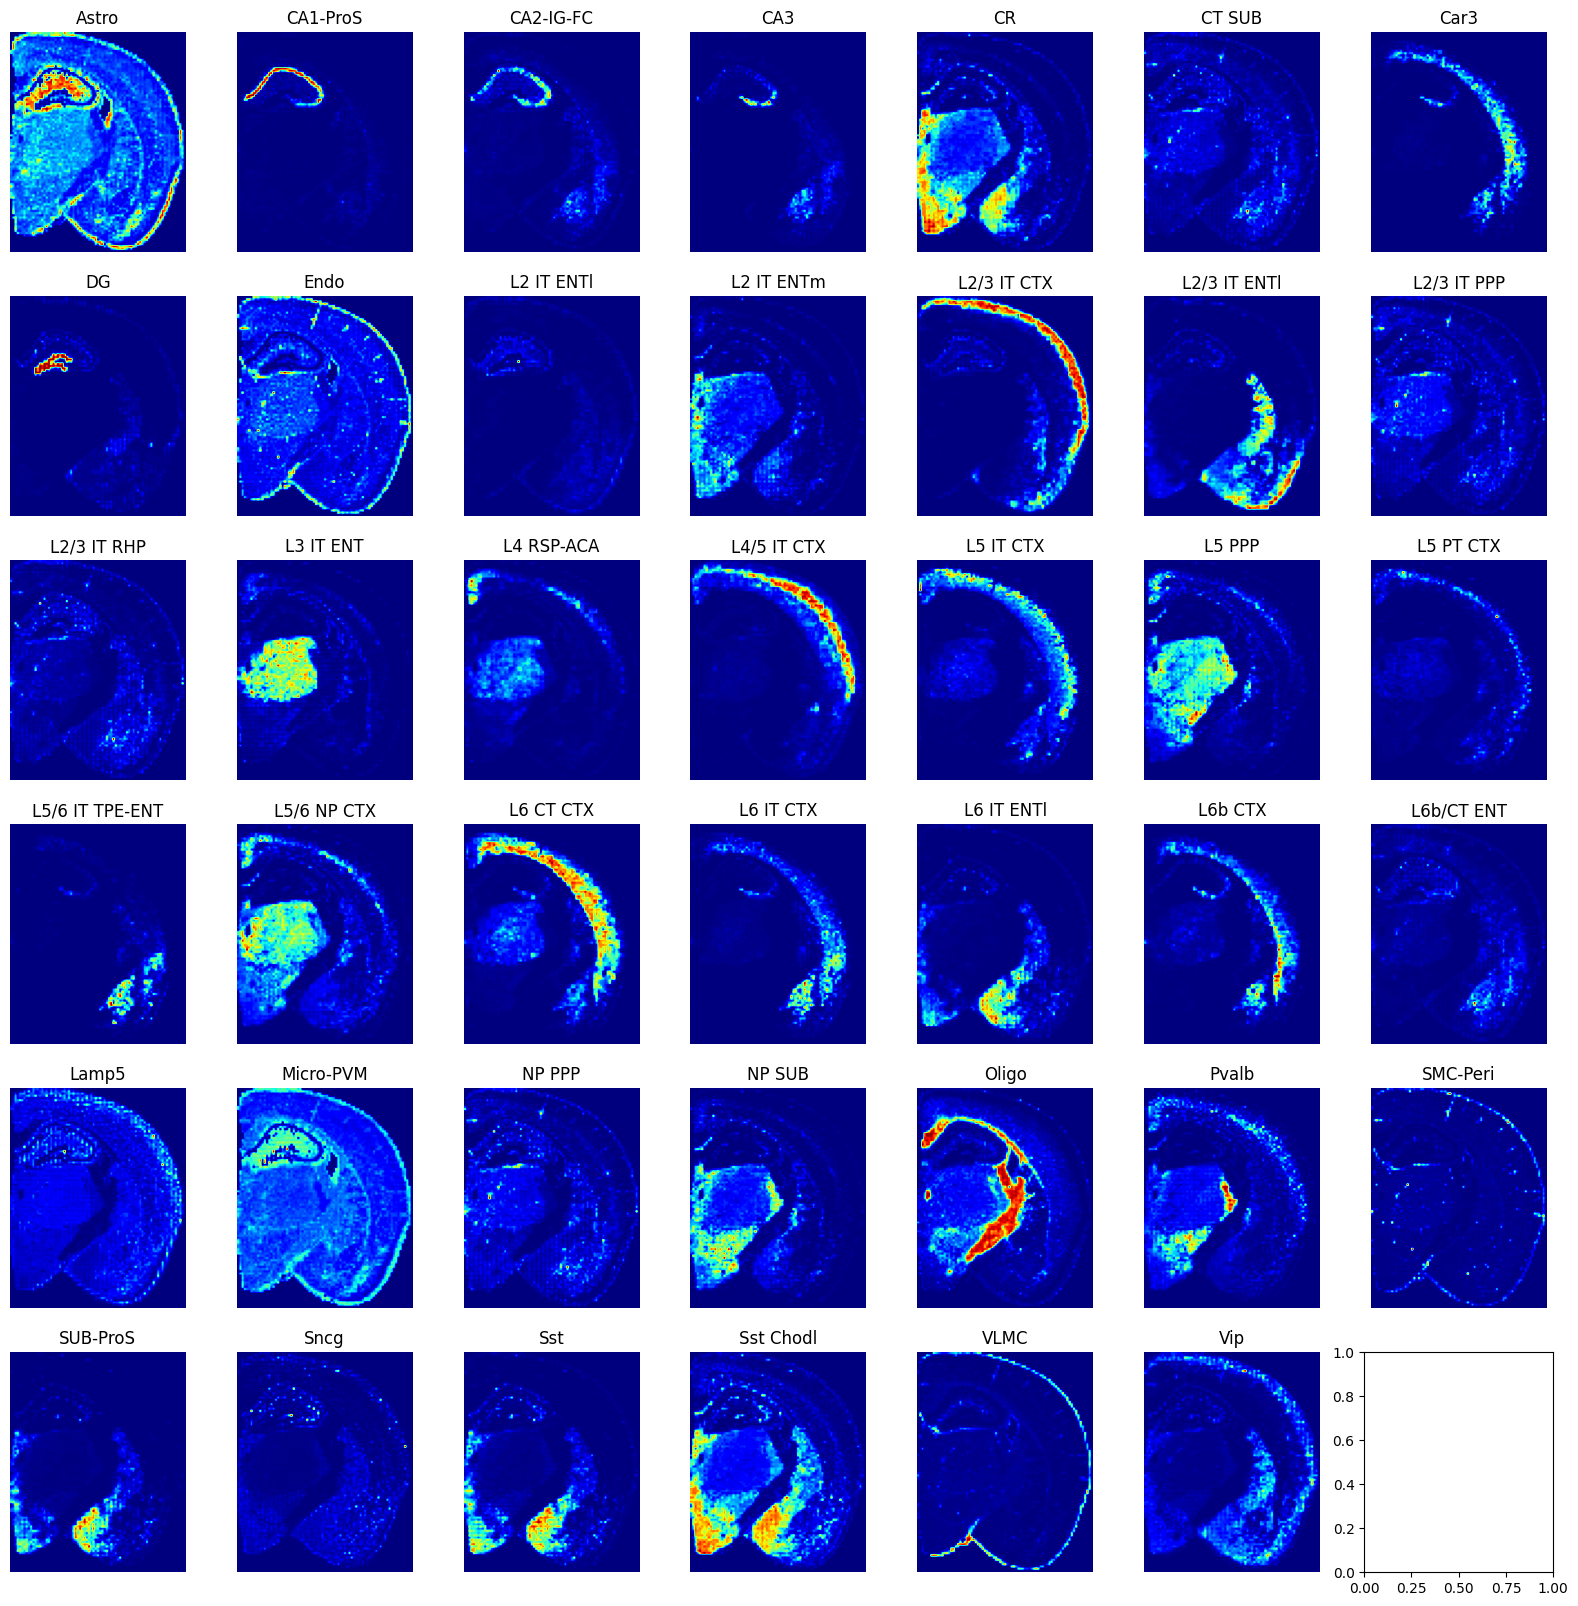

In [404]:
# 64um
log_dir = "/import/macyang_home2/ychenlp/Code/SpotFPN/Log_test/"
deconv_map = tifffile.imread(log_dir + "deconv_beta_map.tif")
visualize_deconv_map(deconv_map, celltype_names)

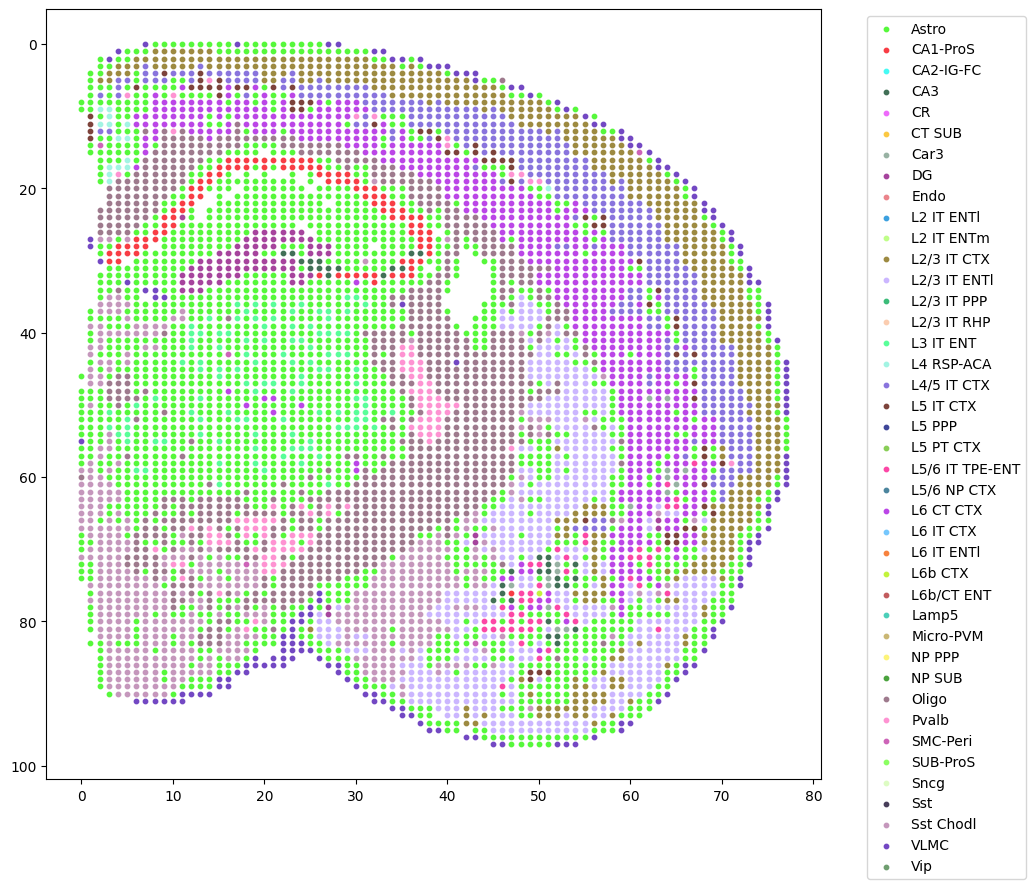

In [405]:
plot_top_view(deconv_map, celltype_names, size=10)

In [402]:
# Test epoch
log_dir = "/import/macyang_home1/share/ychenlp/ALL_LOG/Log_train_fpn_level_0_8_um_no_hiearchy/"
deconv_map = tifffile.imread(log_dir + "deconv_beta_map.tif")
visualize_deconv_map(deconv_map, celltype_names)

FileNotFoundError: [Errno 2] No such file or directory: '/import/macyang_home1/share/ychenlp/ALL_LOG/Log_train_fpn_level_0_8_um_no_hiearchy/deconv_beta_map.tif'

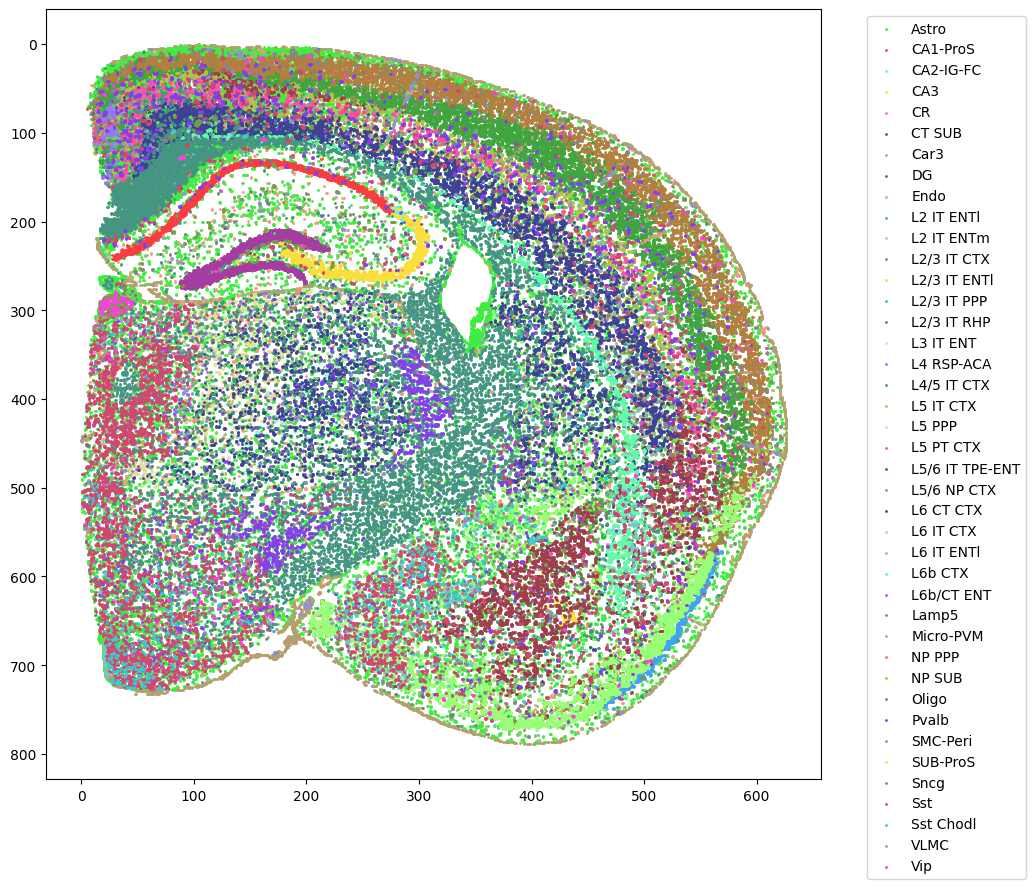

In [293]:
plot_top_view(deconv_map, celltype_names, size=1)

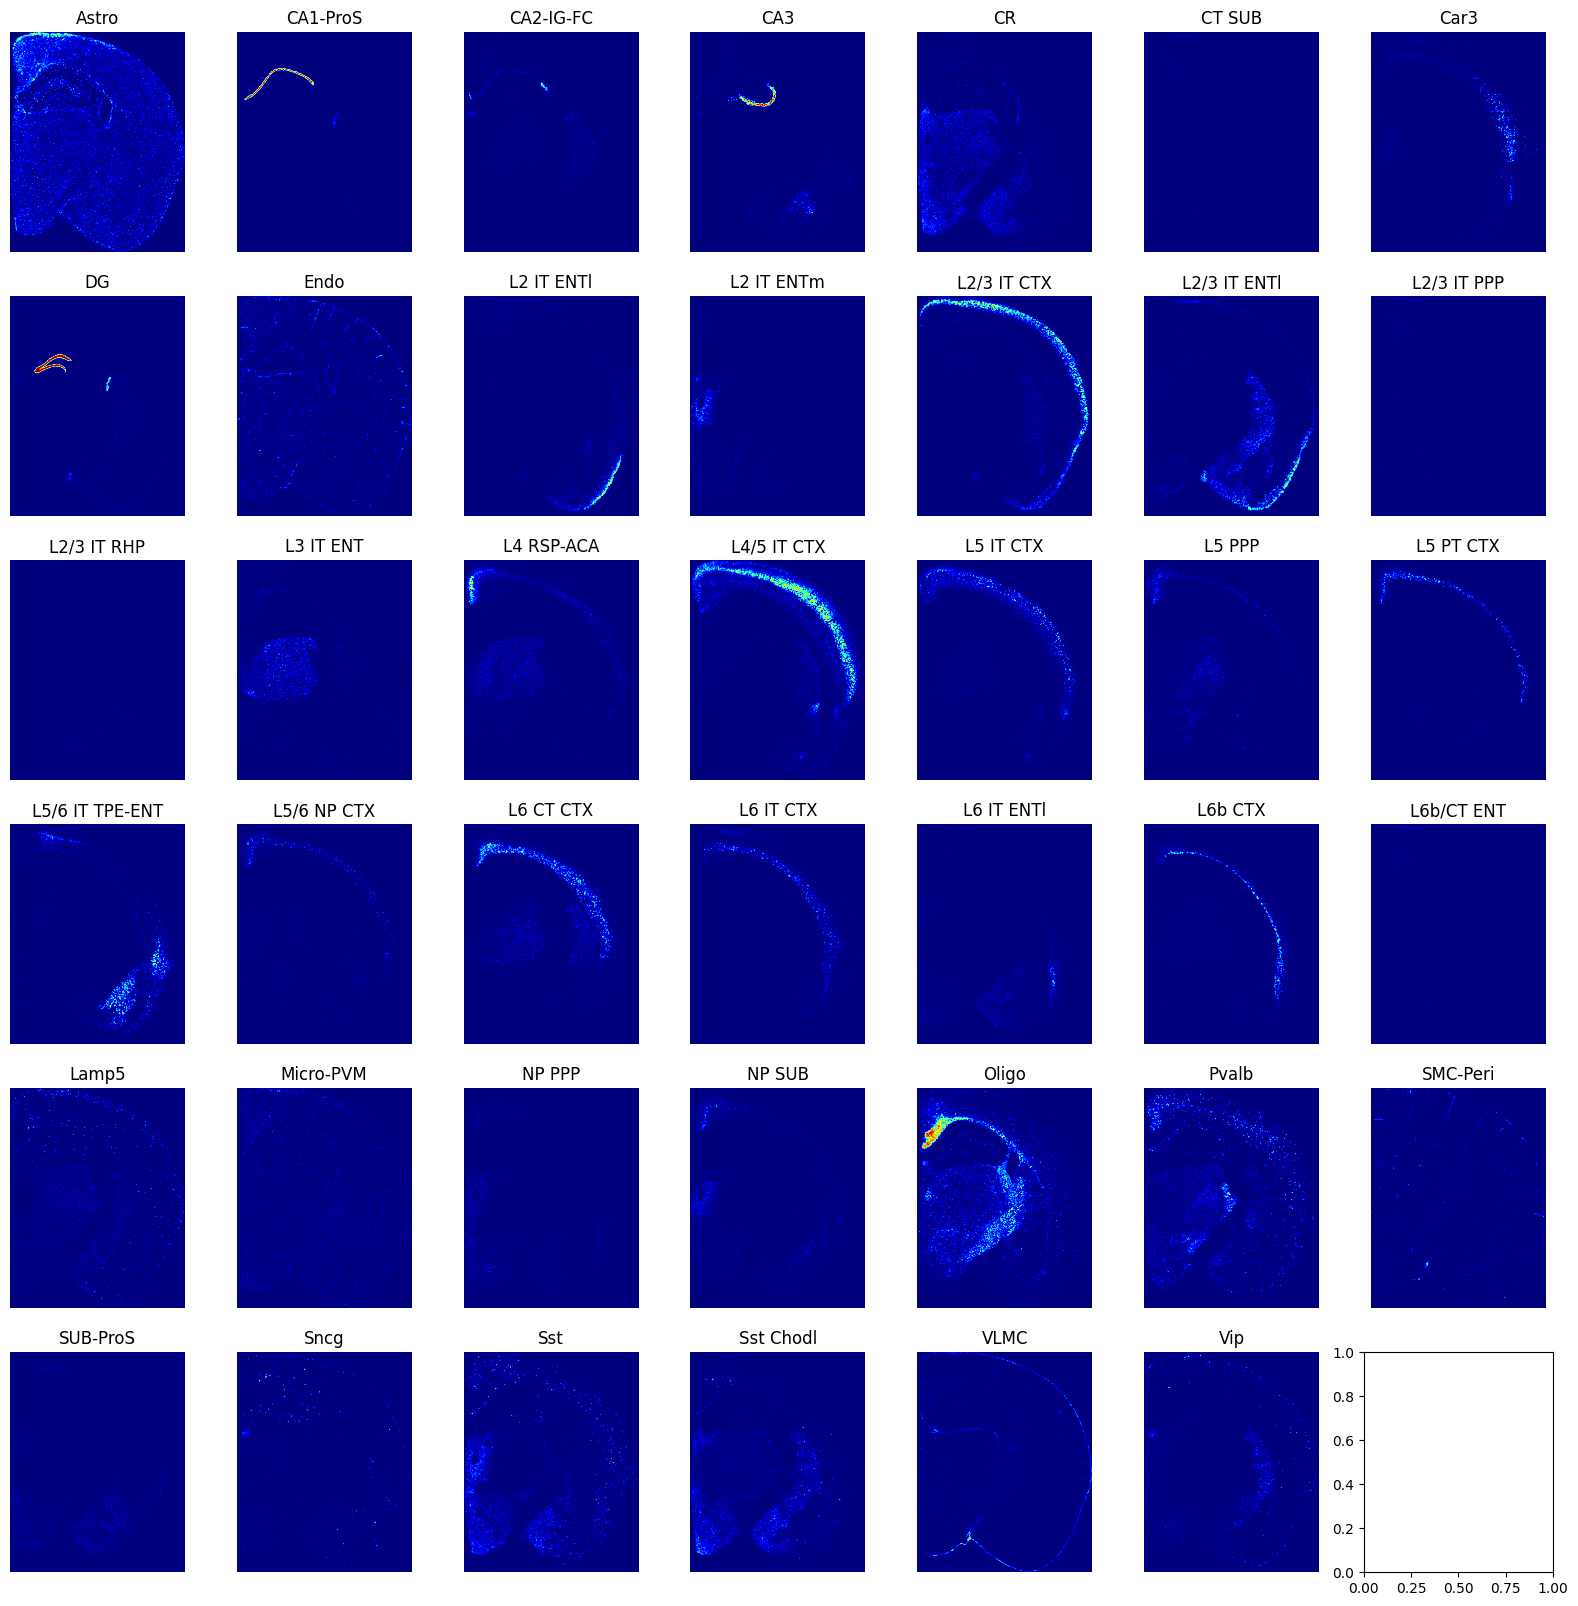

In [407]:
# final
log_dir = "/import/macyang_home1/share/ychenlp/ALL_LOG/Log_test_fpn_level_0_8_um_30_epoch/"
deconv_map = tifffile.imread(log_dir + "deconv_beta_map.tif")
visualize_deconv_map(deconv_map, celltype_names)

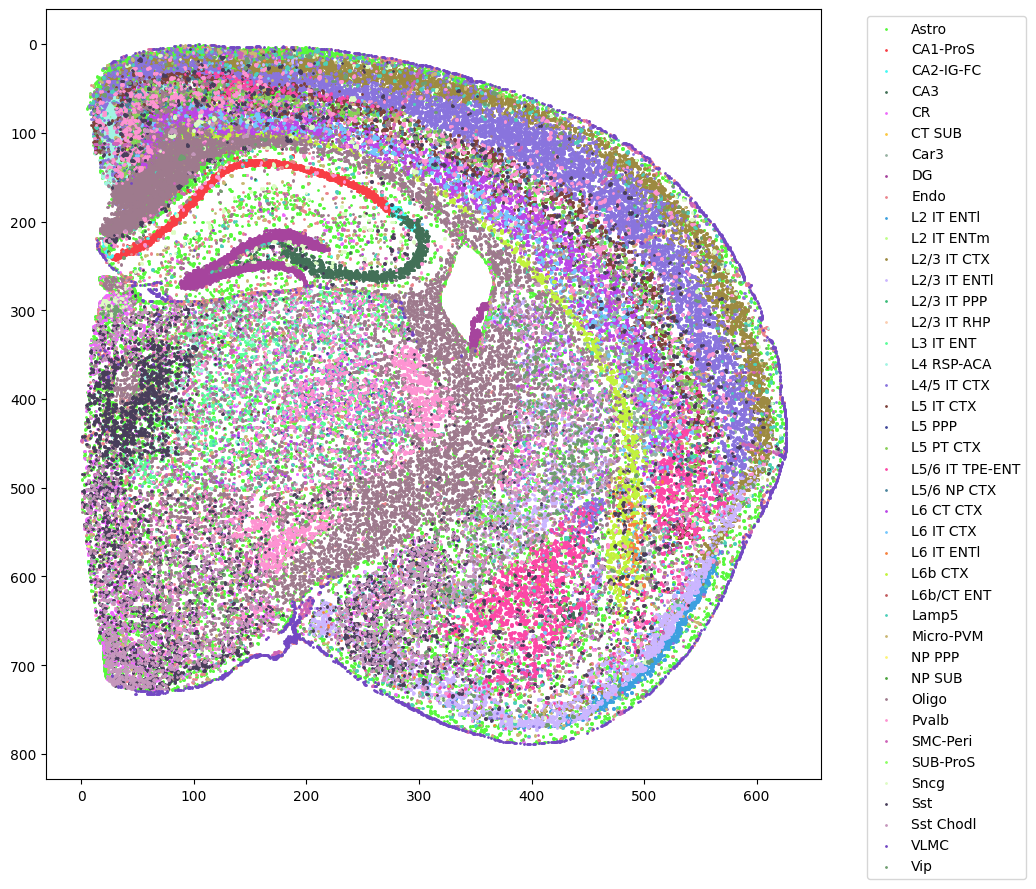

In [408]:
plot_top_view(deconv_map, celltype_names, size=1)

In [294]:
he_path = "/import/macyang_home2/ychenlp/Code/SpotFPN/stardist/he_8um.tiff"
he_img = tifffile.imread(he_path)
he_img = np.flip(he_img, axis=1)
he_img_aligned = he_img[6:,10:, :]

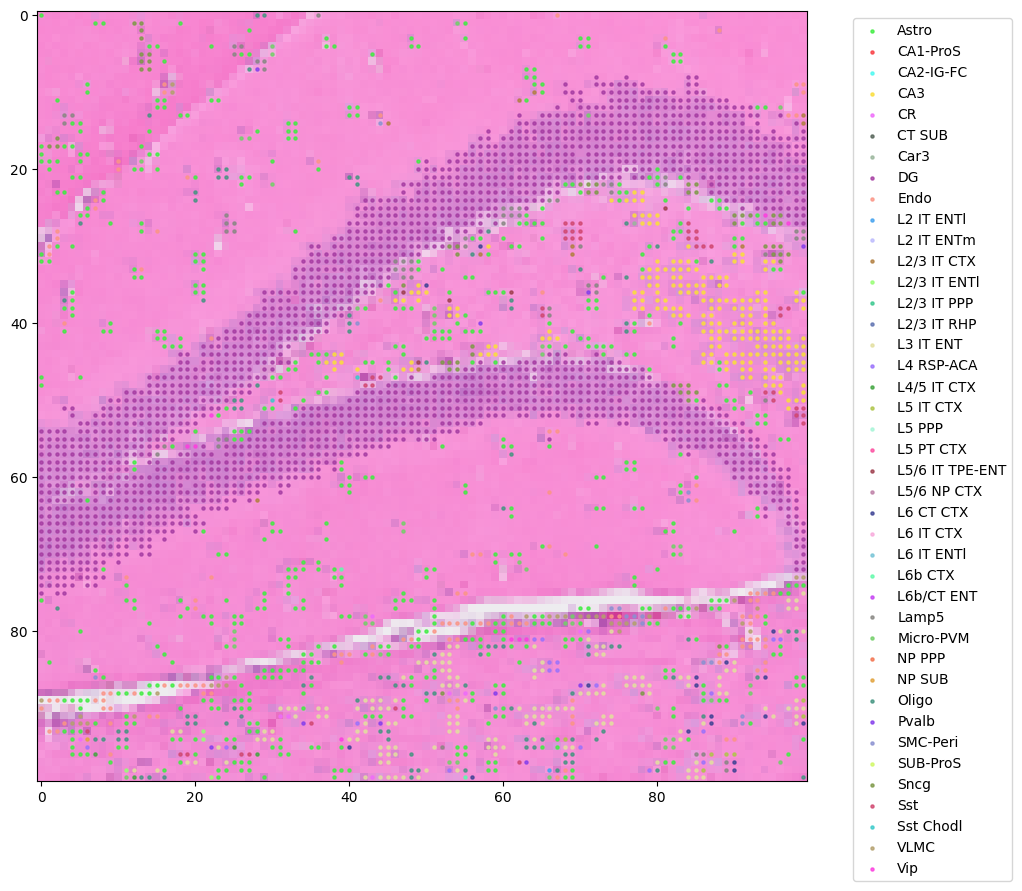

In [295]:
plot_top_view(deconv_map, celltype_names, roi=[200, 300, 100, 200], size=5, he_aligned=he_img_aligned, alpha=0.8)

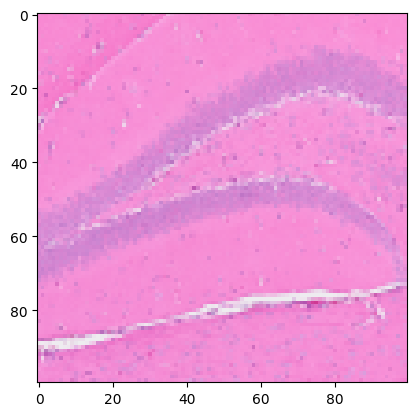

In [305]:
plt.imshow(he_img_aligned[200:300, 100:200, :])

## Check raw resolution of 8um

In [410]:
log_dir = "/import/macyang_home1/share/ychenlp/ALL_LOG/Log_test_fpn_level_0_8_um_30_epoch/"
deconv_map_raw = tifffile.imread(log_dir + "raw_size_deconv_beta_map.tif")

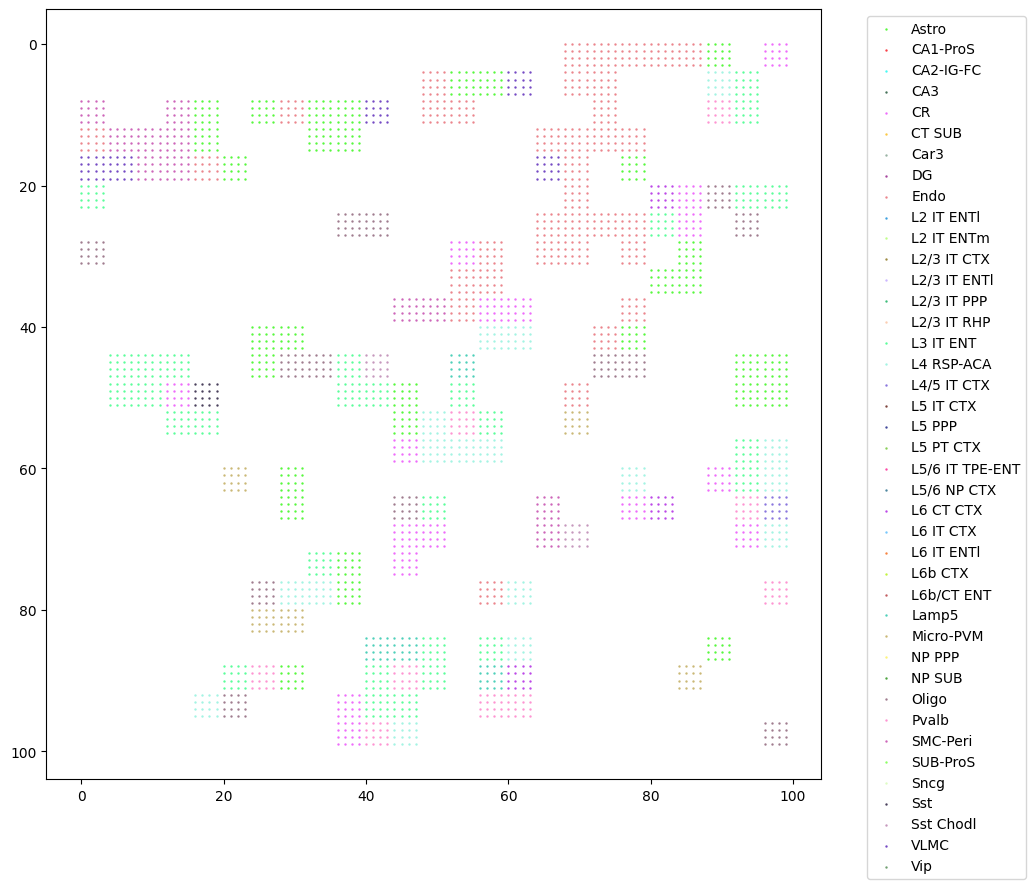

In [411]:
plot_top_view(deconv_map_raw, celltype_names, size=0.5, roi=[1100, 1200, 700, 800])

## Compared RCTD

In [260]:
import pandas as pd

rctd_result = pd.read_csv("/import/macyang_home2/ychenlp/Data/other/result_df.csv", index_col=0)
weights = pd.read_csv("/import/macyang_home2/ychenlp/Data/other/weights.csv", index_col=0)

In [262]:
import spatialdata as sd

sdata = sd.read_zarr("/import/macyang_home2/ychenlp/Data/VisiumHD/all_zarr/mouse_brain.zarr")

/import/macyang_home2/ychenlp/anaconda3/envs/atlas/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/import/macyang_home2/ychenlp/anaconda3/envs/atlas/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/import/macyang_home2/ychenlp/anaconda3/envs/atlas/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [263]:
sdata["square_016um"].obs["rctd_celltype"] = rctd_result["first_type"]

In [265]:
rctd_result["first_type"]

s_016um_00052_00082-1      L6 CT CTX
s_016um_00150_00268-1          Astro
s_016um_00144_00175-1          Oligo
s_016um_00165_00109-1          Oligo
s_016um_00297_00147-1          Oligo
                            ...     
s_016um_00109_00223-1          Oligo
s_016um_00039_00175-1      L5 IT CTX
s_016um_00037_00193-1    L4-5 IT CTX
s_016um_00144_00329-1    L2-3 IT CTX
s_016um_00176_00108-1          Astro
Name: first_type, Length: 98569, dtype: object

In [267]:
celltype_names

array(['Astro', 'CA1-ProS', 'CA2-IG-FC', 'CA3', 'CR', 'CT SUB', 'Car3',
       'DG', 'Endo', 'L2 IT ENTl', 'L2 IT ENTm', 'L2/3 IT CTX',
       'L2/3 IT ENTl', 'L2/3 IT PPP', 'L2/3 IT RHP', 'L3 IT ENT',
       'L4 RSP-ACA', 'L4/5 IT CTX', 'L5 IT CTX', 'L5 PPP', 'L5 PT CTX',
       'L5/6 IT TPE-ENT', 'L5/6 NP CTX', 'L6 CT CTX', 'L6 IT CTX',
       'L6 IT ENTl', 'L6b CTX', 'L6b/CT ENT', 'Lamp5', 'Micro-PVM',
       'NP PPP', 'NP SUB', 'Oligo', 'Pvalb', 'SMC-Peri', 'SUB-ProS',
       'Sncg', 'Sst', 'Sst Chodl', 'VLMC', 'Vip'], dtype='<U15')

In [269]:
sdata["square_016um"]

AnnData object with n_obs × n_vars = 98917 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'location_id', 'region', 'rctd_celltype'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

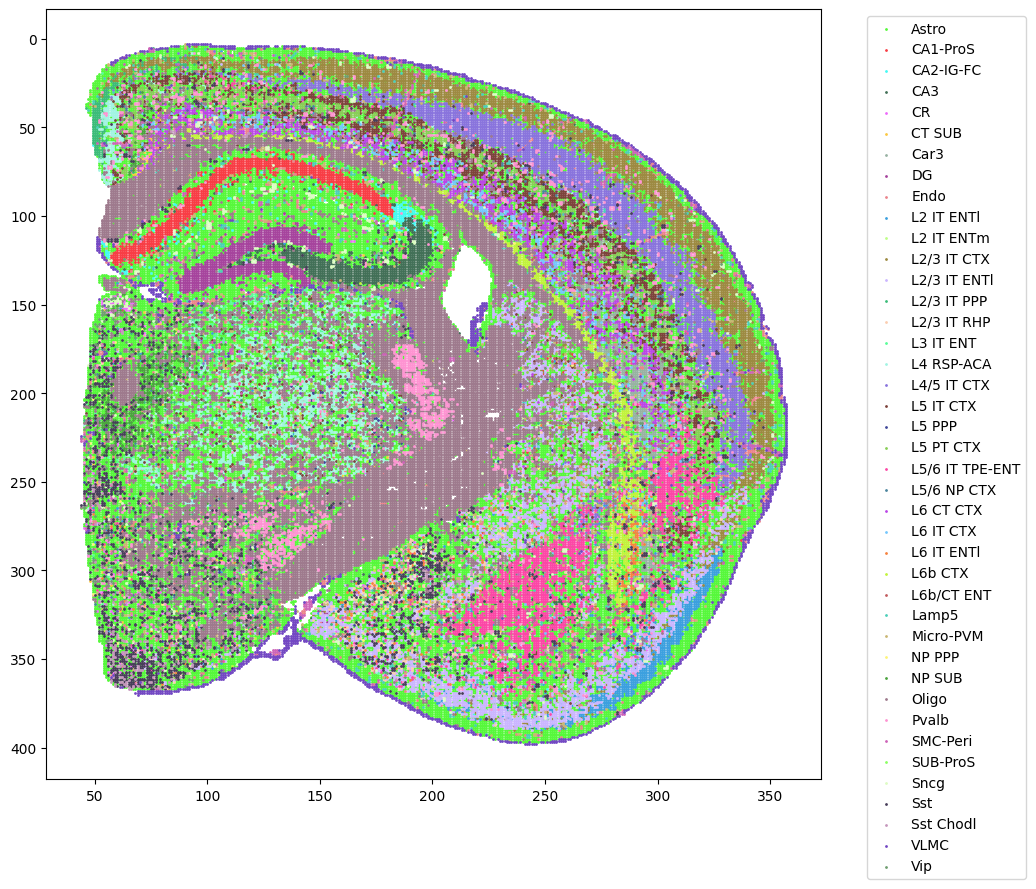

In [400]:
from tqdm.notebook import tqdm
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i in range(len(colors)):
    # (0,0) is on the top left corner
    if i == 0:
        continue
    sub_sdata = sdata["square_016um"][sdata["square_016um"].obs["rctd_celltype"] == celltype_names[i - 1].replace("/", "-")]
    x = sub_sdata.obs['array_row'].values
    y = sub_sdata.obs['array_col'].values
    ax.scatter(y, x, color=colors[i], s=1, label=celltype_names[i - 1])
    # print(f"{celltype_names[i - 1]}: {len(sub_sdata)}")
ax.invert_yaxis()
# Legend outside the plot of two columns
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Segmentation

In [329]:
from skimage.segmentation import find_boundaries

ucs_mask = tifffile.imread("/import/macyang_home1/share/ychenlp/ALL_LOG/Log_ucs_seg/pred/segmentation_mask.tif")
ucs_boundaries = find_boundaries(ucs_mask,  mode='inner')
he = tifffile.imread("/import/macyang_home2/ychenlp/Code/SpotFPN/stardist/he_2um.tiff")
he = np.flip(he, axis=1)
he_aligned = he[12:, 27:, :]

In [339]:
log_dir = "/import/macyang_home1/share/ychenlp/ALL_LOG/Log_test_fpn_level_0_8_um_30_epoch/"
raw_size_deconv_map = tifffile.imread(log_dir + "raw_size_deconv_beta_map.tif")

In [308]:
gene_map_sum = np.sum(raw_map, axis=2)

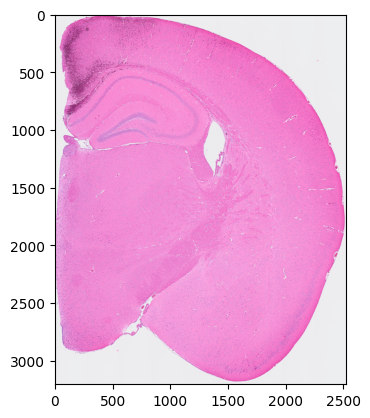

In [343]:
plt.imshow(he_aligned)

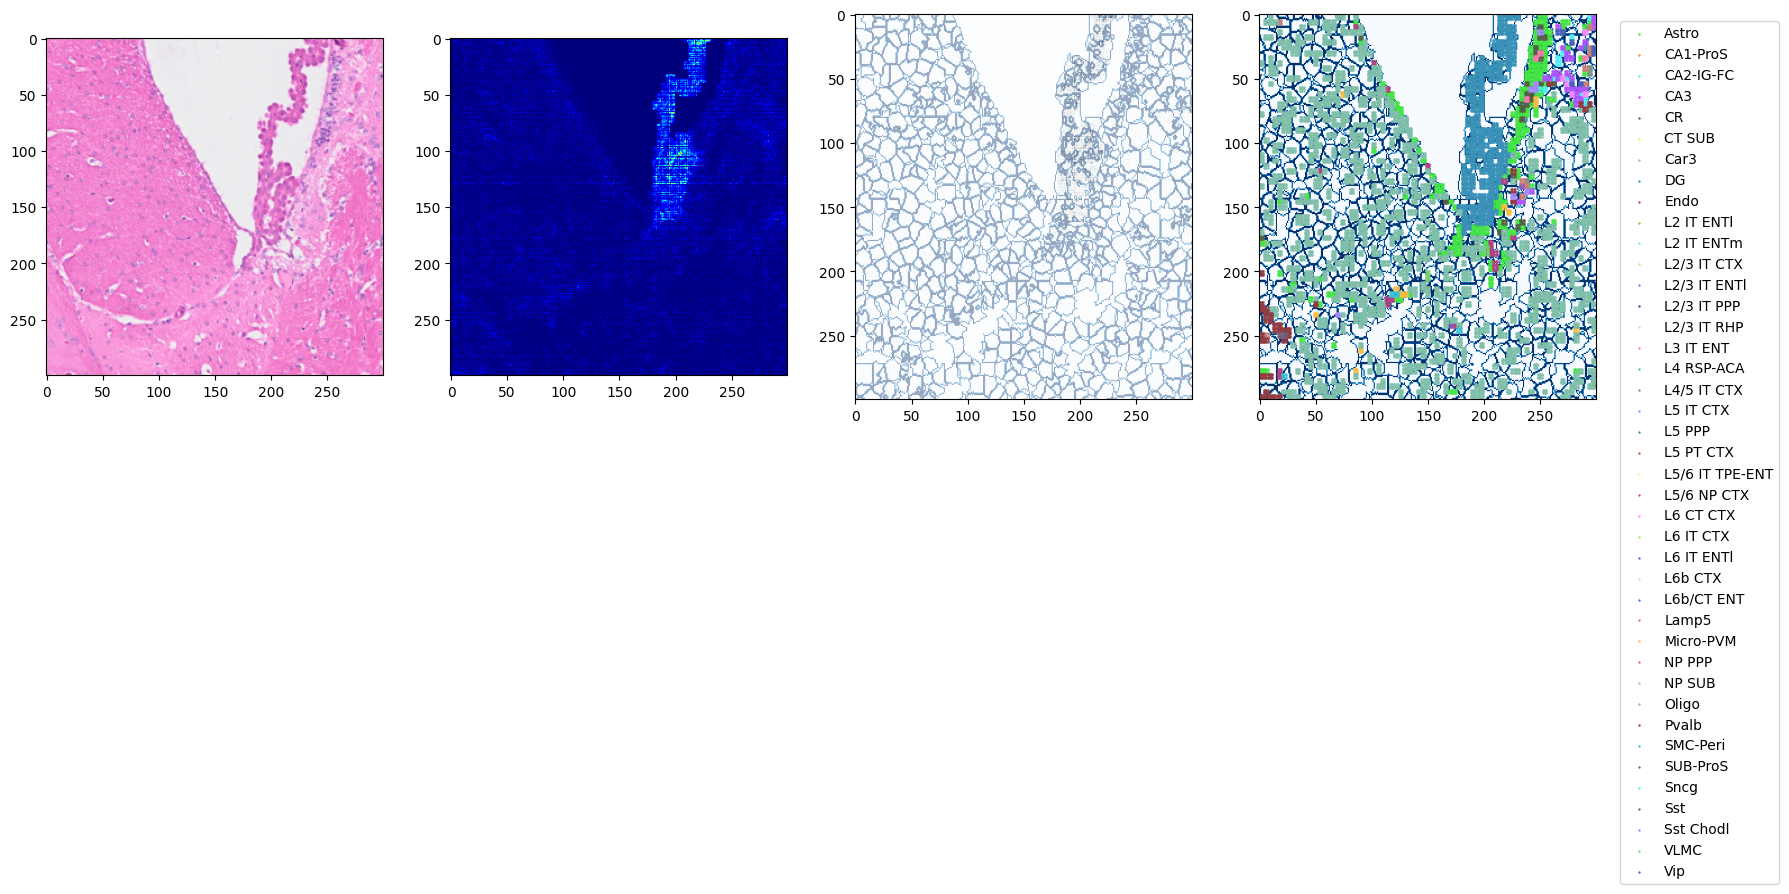

In [347]:
x_min, x_max, y_min, y_max = 1200, 1500, 1200, 1500

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(he_aligned[x_min:x_max, y_min:y_max, :])
ax[1].imshow(gene_map_sum[x_min:x_max, y_min:y_max], cmap='jet')

ax[2].imshow(ucs_boundaries[x_min:x_max, y_min:y_max], aspect='auto', cmap='Blues')
ax[2].imshow(gene_map_sum[x_min:x_max, y_min:y_max], aspect='auto', cmap='Greys', alpha=0.6)

ax[3].imshow(ucs_boundaries[x_min:x_max, y_min:y_max], aspect='auto', cmap='Blues')
plot_top_view(raw_size_deconv_map, celltype_names, size=0.5, roi=[x_min, x_max, y_min, y_max], ax=ax[3])
ax[3].invert_yaxis()

In [354]:
raw_deconv_map_sum = np.sum(raw_size_deconv_map, axis=2)
zero_mask = raw_deconv_map_sum == 0
argmax_deconv_map = np.argmax(raw_size_deconv_map, axis=2) + 1
argmax_deconv_map[zero_mask] = 0

In [361]:
import pandas as pd
cell_ids = np.unique(ucs_mask)[1:]
df = pd.DataFrame(index=cell_ids)
df["celltype"] = ""
df["center_x"] = 0
df["center_y"] = 0

In [391]:
# Assigned label for each cell
from tqdm.notebook import tqdm
import torch

ucs_mask_tensor = torch.tensor(ucs_mask).cuda()
argmax_deconv_map = torch.tensor(argmax_deconv_map).cuda()
# Argmax along the z axis
bar = tqdm(enumerate(cell_ids), total=len(cell_ids))
empty_cells = []
for i, cell_id in bar:
    if cell_id == 0:
        continue
    cell_mask = ucs_mask_tensor == cell_id
    cell_label = argmax_deconv_map[cell_mask]
    # Select the most frequent label: bincount, 0 is background so we take the second most frequent
    label_counts = np.bincount(cell_label.cpu().numpy())[1:]
    if len(label_counts) == 0:
        empty_cells.append(cell_id)
        bar.set_postfix(empty_cells=len(empty_cells))
        continue
    max_count_label = np.argmax(label_counts) + 1
    df.loc[cell_id, "celltype"] = celltype_names[max_count_label - 1]
    x, y = torch.where(cell_mask)
    df.loc[cell_id, "center_x"] = np.mean(x.cpu().numpy())
    df.loc[cell_id, "center_y"] = np.mean(y.cpu().numpy())
    

/tmp/ipykernel_1634336/3755255535.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  argmax_deconv_map = torch.tensor(argmax_deconv_map).cuda()


  0%|          | 0/60210 [00:00<?, ?it/s]

In [393]:
df

celltype     center_x     center_y
1      L2/3 IT CTX   548.428030  1966.087121
2      L2/3 IT CTX   655.685185  2016.769841
3      L2/3 IT CTX   546.143836  1955.486301
4      L2/3 IT CTX   405.418239  1702.547170
5      L2/3 IT CTX   654.364238  1973.172185
...            ...          ...          ...
61982        Pvalb  2491.620690   151.758621
61983    Sst Chodl  2685.285714   149.000000
61984         VLMC  2833.166667   531.666667
61985    Sst Chodl  2851.000000   144.333333
61986        Pvalb  2587.600000   596.650000

[60210 rows x 3 columns]

In [394]:
np.unique(df["celltype"], return_counts=True)

(array(['Astro', 'CA1-ProS', 'CA2-IG-FC', 'CA3', 'CR', 'Car3', 'DG',
        'Endo', 'L2 IT ENTl', 'L2 IT ENTm', 'L2/3 IT CTX', 'L2/3 IT ENTl',
        'L3 IT ENT', 'L4 RSP-ACA', 'L4/5 IT CTX', 'L5 IT CTX', 'L5 PPP',
        'L5 PT CTX', 'L5/6 IT TPE-ENT', 'L5/6 NP CTX', 'L6 CT CTX',
        'L6 IT CTX', 'L6 IT ENTl', 'L6b CTX', 'Lamp5', 'Micro-PVM',
        'NP PPP', 'NP SUB', 'Oligo', 'Pvalb', 'SMC-Peri', 'SUB-ProS',
        'Sncg', 'Sst', 'Sst Chodl', 'VLMC', 'Vip'], dtype=object),
 array([10785,   822,   131,   517,  2308,   501,  1843,  2046,   416,
           54,  3207,  2144,   726,   978,  4972,  1131,    82,   652,
         1349,   338,  2443,   553,   114,   735,   680,   812,     6,
           68, 10309,  2693,   462,    43,   310,  2522,  1669,  1160,
          629]))

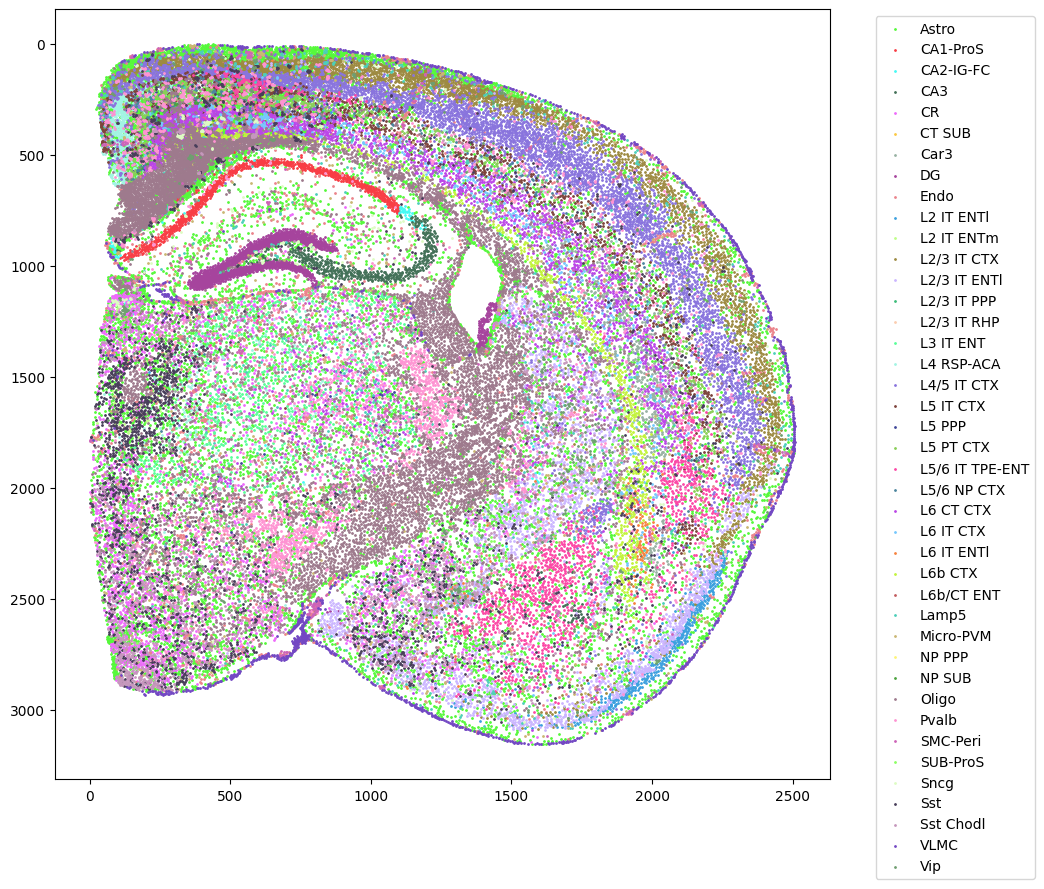

In [399]:
# Plot 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i in range(len(colors)):
    # (0,0) is on the top left corner
    if i == 0:
        continue
    sub_df = df[df["celltype"] == celltype_names[i - 1]]
    ax.scatter(sub_df["center_y"], sub_df["center_x"], color=colors[i], s=1, label=celltype_names[i - 1])
    # print(f"{celltype_names[i - 1]}: {len(sub_sdata)}")
ax.invert_yaxis()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')